Report

This project will look at crime data from Boston from 2022 to investigate what factors are predicting factors to whether a crime committed invovled a shooting or not. This project will analyze if the location, time, month, district, and day a crime is commited in have an effect on whether the crime involved a shooting or not. The data used for this project comes from the Boston police department database where data on other years can be found as well. This investigation will help understand what the most significant predictors for whether crimes involve shootings or not are. This is important with the increasing number of shootings in the US and more insights are always helpful in understanding patterns in shooting crimes as well as suggesting proactive solutions to the problem of gun related crimes in America (more specifically in Boston). Analysis of similar data from Boston PD for crimes in 2018 by Pankaj Shah found that: 
- The most affected districts in Boston are Dorchester, South-End (D-4), Roxbury (B-2).
- It can be noted that the highest number of the crimes were reported during summer months of July and Auguest.
- Motor-Vehicle accident response were the highest number of report registered with the Boston Police.

The data contains crimes that occured in Boston in 2022. The resulting clean data has 70007 observations and 14 variables. Important variables are: OFFENSE_CODE which is an assigned code to a crime type, OFFENSE_DESCRIPTION which is the specific crime the offense code/crime type is, DISTRICT is the district the crime was committed in, SHOOTING which is whether the crime involved a shooting or not; YEAR, MONTH, DAY_OF_WEEK, HOUR which respectively contain the year, month, day of the week, and hour a crime was committed on; Lat and Long which are the latitude and longitude where the crime is committed. 

The data exploration shows that of the 70007 crimes that occurred in Boston in 2022, 69291 did not involve a shooting while 716 did. When viewing the crimes by their latitude and longitude, it is clear that regions closer to the center have more crimes that have involved a shooting that regions closer to the edges of the city. This is moreover demonstrated by the fact that Districts B2, B3, and C11 which are closer to the center of Boston (Zimmerman and Douglas, 2020). Furthermore, although there is little fluctuation in the frequency of shootings over months, there are clear variations throughout the day where times around midnight have significantly higher shootings while early morning has significantly fewer shootings. 

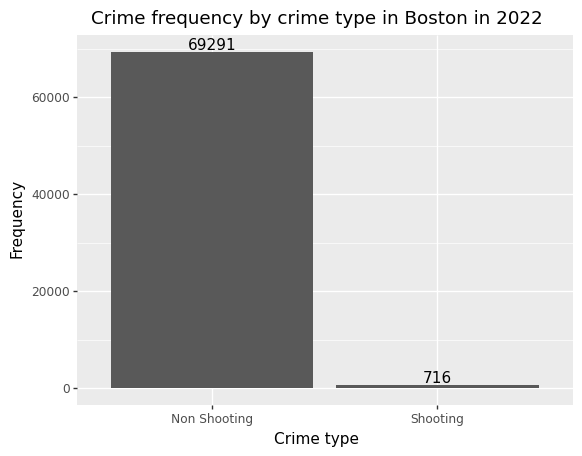

- Bar chart of the number of crimes that did and did not involve shootings in Boston in 2022. 69291 crimes did not involve shootings while only 716 invovled a shooting. 

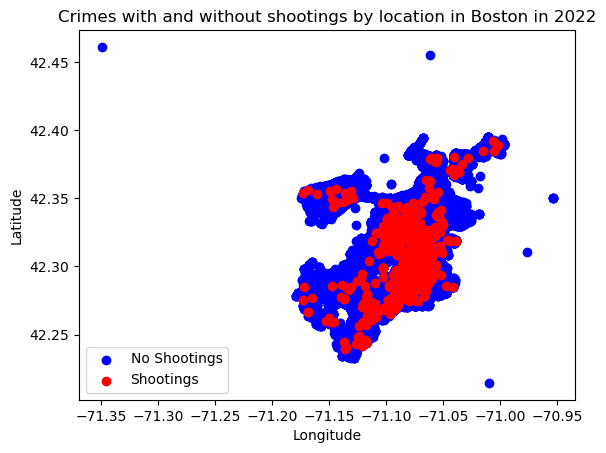

- The scatter plot of the crimes in boston in 2022 accounting for shootings shows that there are regions with more shootings than others, especially between longitude -70.05 and -71.1 and latitude 42.25 and 42.35. These are where districts B2, B3, and C11 are found (Zimmerman and Douglas, 2020). The center of the city has more crimes involving shootings than places near the outside. This suggests that a KNN classifier model is a natural choice for models. This implies that the Latitude and Longitude could be potential predictors for whether a crime committed in Boston invovlved a shooting. 

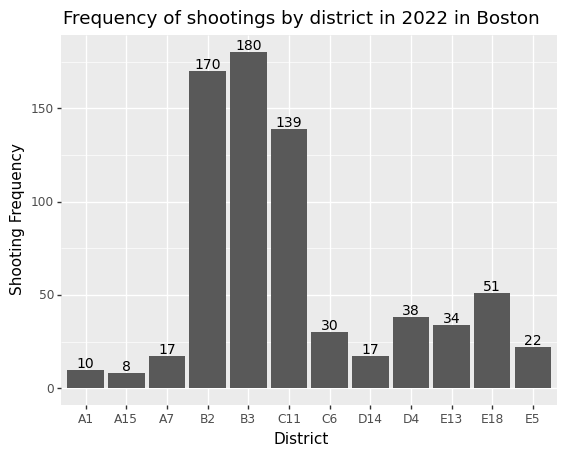

- The barchart of the shooting frequency by districts in Boston in 2022 shows that districts B2, B3, and C11 have a significantly higher number of shootings compared to other districts. Districts A1 and A15 have the lowest shooting frequency. This implies that the district a crime occurred in can be used as a predictor for whether it involved a shooting or not. 

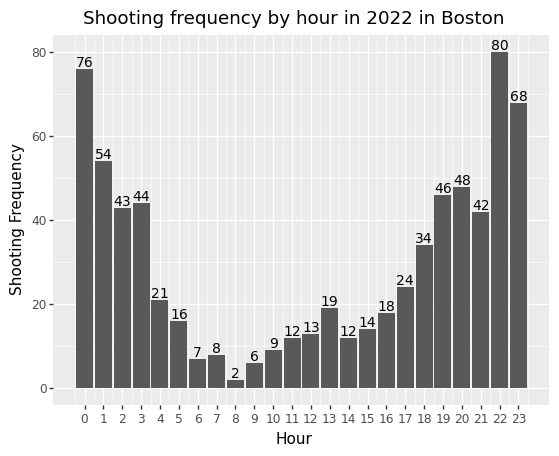

- The bar plot of the shooting frequency in Boston in 2022 across the day demonstrates that the number of shootings is highest around midnight (21 to 1) and lowest around morning and early evening (4 to 17). This implies that the hour could be a potential predictor for whether a crime committed in Boston invovlved a shooting. 

The variance inflation factor shows that Lat, Long, District_E18, and District_E5 have significant multicorrelation. It makes sense that Latitude and Longitude are highly correlated to each other (with scores of 17396348.0 and 17436869.0 respectively) and the district data since they all denote location. District_B3 has a VIF score of 9 which implies higher multicorrelation. Other variables have insignificant multicorrelation. The correlation martrix also shows that Districts D14, E5, E18, A7, and B3 have high correlation with Lat and Long of magnitudes above 0.3. Furthermore, Lat and Long have a correlation of 0.376 as well. 

For all models, a random sample of crimes that did not involve shootings of size 716 is taken with all 716 crimes that involved shootings for training and testing. Otherwise, all models will be skewed to only predicting/classifying crimes as not involving shootings as it results in an accuracy of approximately $\frac{69291}{70007}= 0.9898.$

Because of the high multicorrelation that latitude and longitude have, the first model that will be considered is a logistic regression with lasso to investigate the relationship between crimes involving shootings and month, day, hour, and location. A logistic regression with lasso is chosen because:
  - The response variable is binary (a crime involves a shooting or not),
  - There are multiple predictors and lasso will aid in feature selection and identifying the most signficant predictors,
  - Lasso will help mitigate the identified multicorrelation.

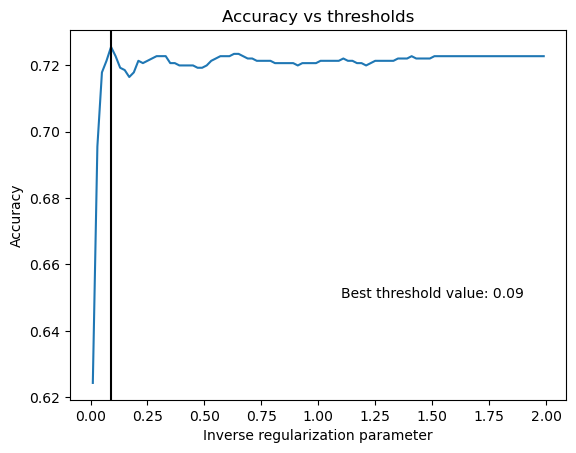

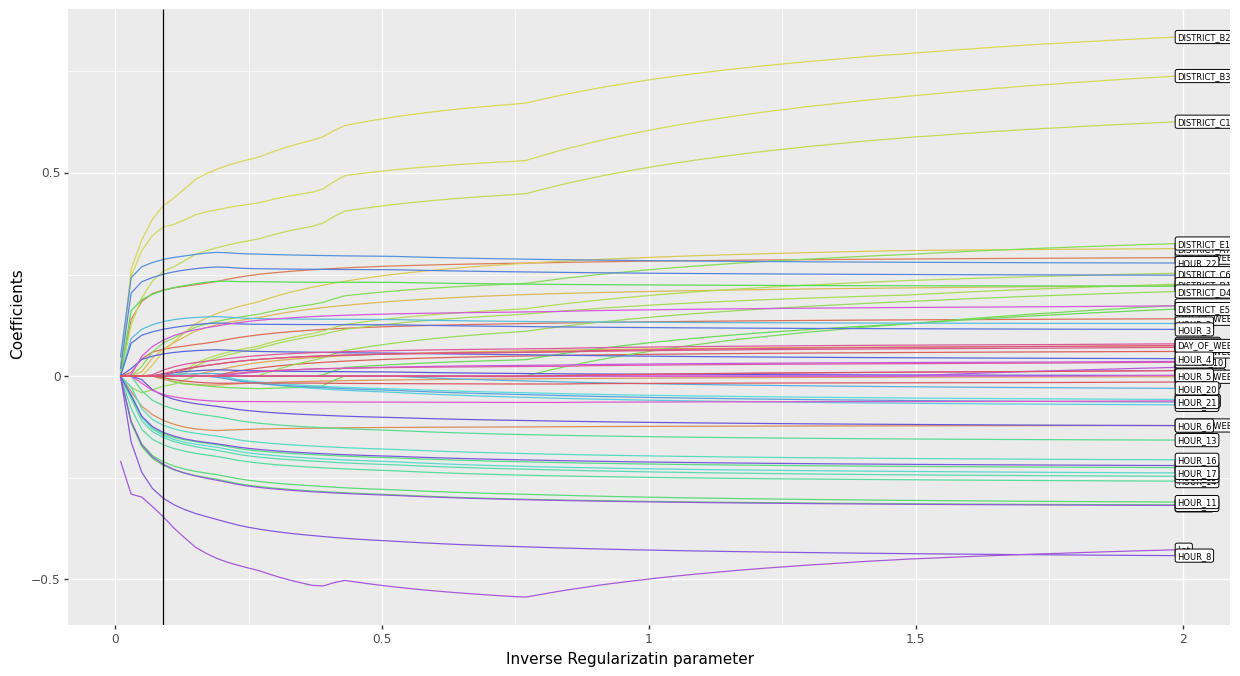

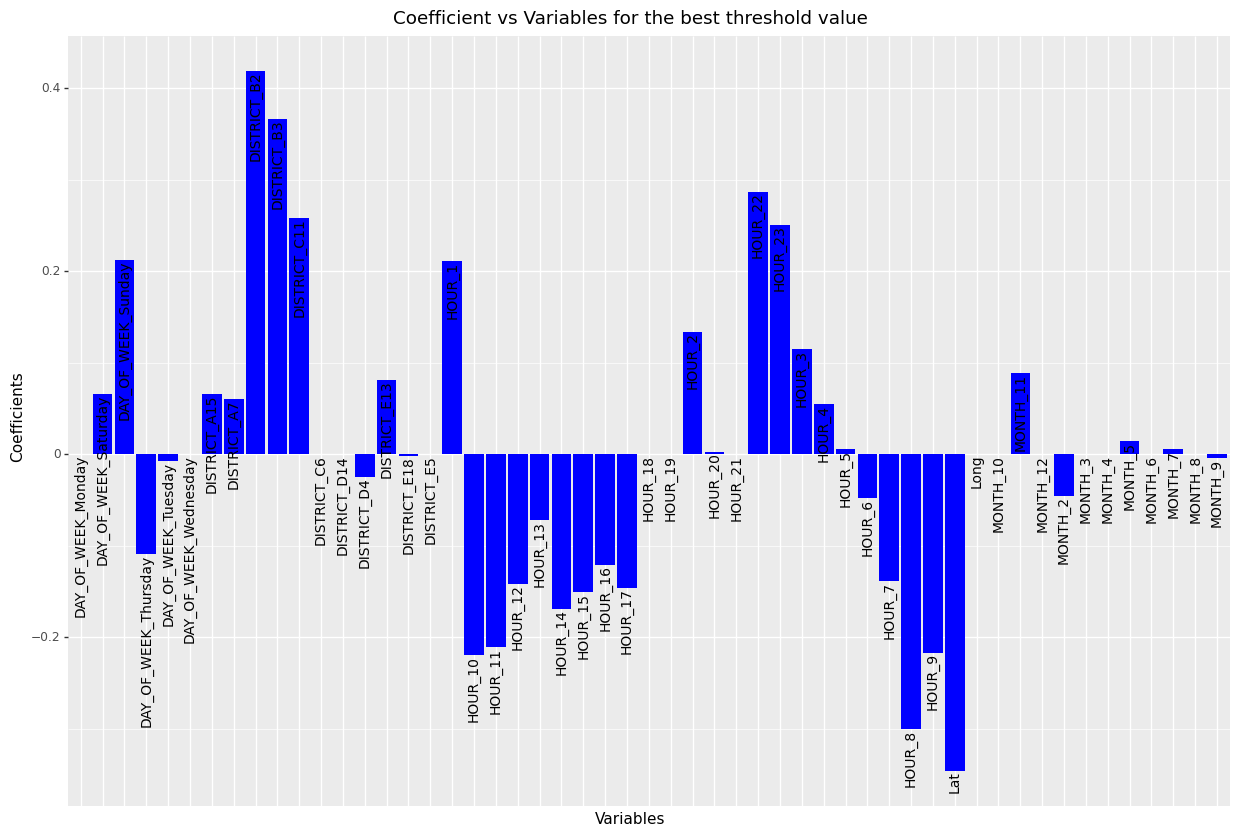

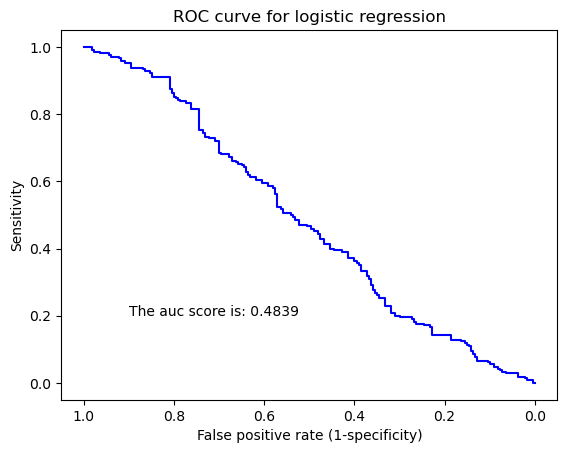

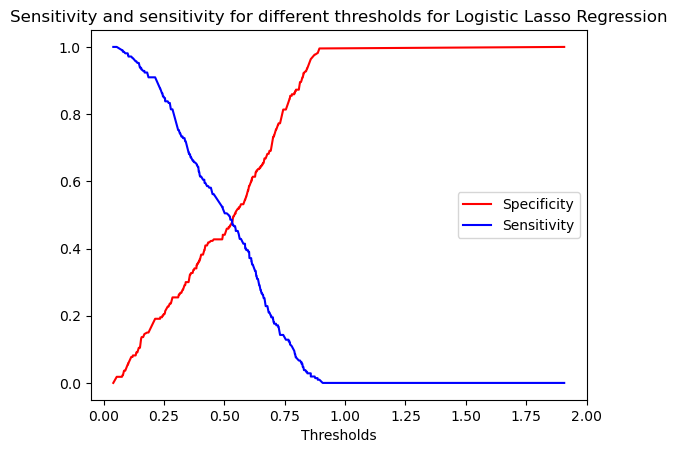

Bibliography

https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

https://rstudio-pubs-static.s3.amazonaws.com/453629_6be32e64d25b4e7189bc3bbe6968bcaf.html#data-preparation

https://www.researchgate.net/figure/Boston-Police-Department-districts-included-in-BWC-evaluation_fig1_336674159

Script for data cleaning, data exploration, and modeling

In [ ]:
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

DATA CLEANING

In [ ]:
crime = pd.read_csv('C:/Users/nathn/Downloads/DATA 119/Project/2022_boston_crime.csv')
crime.head()

C:\Users\nathn\AppData\Local\Temp\ipykernel_4504\2255571046.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,222076257,619,NaN,LARCENY ALL OTHERS,D4,167,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,HARRISON AVE,42.339542,-71.069409,"(42.33954198983014, -71.06940876967543)"
1,222053099,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A7,,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BENNINGTON ST,42.377246,-71.032597,"(42.37724638479816, -71.0325970804128)"
2,222039411,3201,NaN,PROPERTY - LOST/ MISSING,D14,778,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"
3,222011090,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
4,222062685,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"


In [ ]:
crime.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     73852
OFFENSE_DESCRIPTION        0
DISTRICT                 171
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               73852
STREET                     1
Lat                     3808
Long                    3808
Location                3808
dtype: int64

In [ ]:
crime['OFFENSE_CODE'] = crime['OFFENSE_CODE'].astype(str)
offense_dict = crime[['OFFENSE_CODE','OFFENSE_DESCRIPTION']].dropna()
offense_dict = dict(zip(offense_dict['OFFENSE_CODE'],offense_dict['OFFENSE_DESCRIPTION']))

crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'].astype('str').str.split(' ').str[0])
crime.drop(['UCR_PART','OFFENSE_CODE_GROUP','REPORTING_AREA'],axis=1,inplace=True)
crime.dropna(inplace=True)
crime.isna().sum()


INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [ ]:
crime.shape

(70007, 14)

Data cleaning included converting the date to the YYYY-MM-DD format, dropping unnecessary columns, dropping NA values, and converting the OFFENSE_CODE values to strings. The resulting clean data has 70007 observations and 14 variables.

Crime frequency by shooting

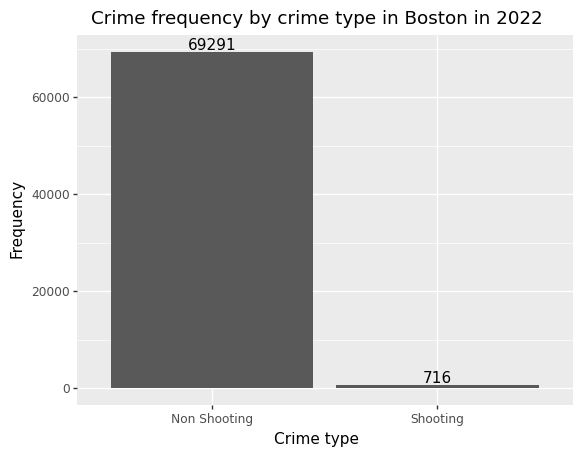

<ggplot: (172407046598)>

In [ ]:
shootings = crime['SHOOTING'].astype(str)
shootings = shootings.apply(lambda x: "Shooting" if x == '1' else 'Non Shooting')

shootings = pd.DataFrame({'Crime_type':shootings.value_counts().index, 'Count':shootings.value_counts()})
shootings.reset_index(drop=True, inplace=True)

(p9.ggplot(shootings, p9.aes(x = 'Crime_type', y = 'Count'))+
 p9.geom_bar(stat = 'identity')+
 p9.geom_text(p9.aes(label='Count'),va = 'bottom')+
 p9.labs(x = 'Crime type', y = 'Frequency', title = 'Crime frequency by crime type in Boston in 2022'))

The bar plot of the crime frequency by whether the crime invovled a shooting in Boston in 2022 shows that the majority of crimes did not involve shootings. 69291 crimes did not involve shootings while only 716 invovled a shooting. 

Shooting by location

In [ ]:
location_shooting = crime[crime['SHOOTING'] == 1][['Long','Lat']]
location_noshooting = crime[crime['SHOOTING'] == 0][['Long','Lat']]

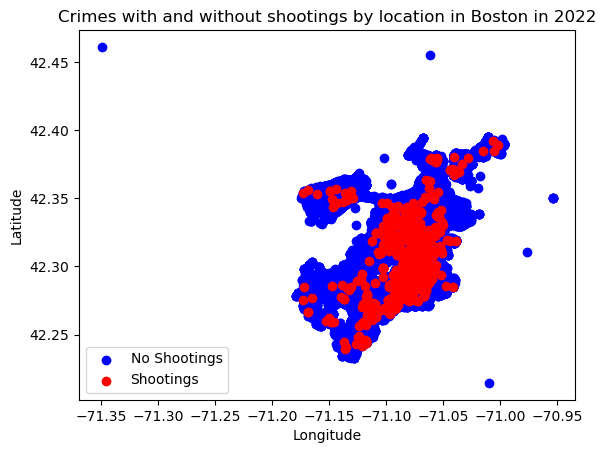

In [ ]:
plt.scatter(location_noshooting.Long, location_noshooting.Lat, c = 'blue', label = 'No Shootings')
plt.scatter(location_shooting.Long, location_shooting.Lat, c = 'red', label = 'Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crimes with and without shootings by location in Boston in 2022')
plt.legend(loc = 0)
plt.show()

The scatter plot of the crimes in boston in 2022 accounting for shootings shows that there are regions with more shootings than others, especially between longitude -70.05 and -71.1 and latitude 42.25 and 42.35. The center of the city has more crimes involving shootings than places near the outside. This suggests that a KNN classifier model is a natural choice for models. This implies that the Latitude and Longitude could be potential predictors for whether a crime committed in Boston invovlved a shooting. 

Shooting by time of day

In [ ]:
time_shoot = crime[crime['SHOOTING'] == 1].groupby('HOUR')['SHOOTING'].sum().reset_index()
time_shoot.head()

,HOUR,SHOOTING
0,0,76
1,1,54
2,2,43
3,3,44
4,4,21


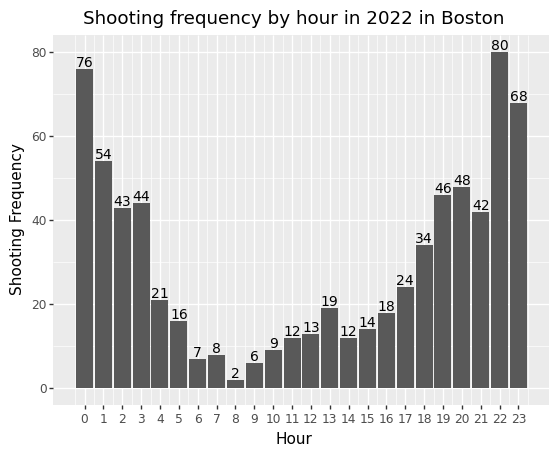

<ggplot: (172409946527)>

In [ ]:
(p9.ggplot(time_shoot, p9.aes(x = 'HOUR', y = 'SHOOTING'))+
 p9.geom_bar(stat = 'identity')+
 p9.geom_text(p9.aes(label = 'SHOOTING'), va = 'bottom', size = 10)+
 p9.labs(title = 'Shooting frequency by hour in 2022 in Boston', y = 'Shooting Frequency', x = 'Hour')+
 p9.scale_x_continuous(breaks=time_shoot['HOUR'].unique()))

Considering the bar plot of the shooting frequency in Boston in 2022 across the day, it is clear that the number of shootings is highest around midnight (21 to 1) and lowest around morning and early evening (4 to 17). This implies that the hour could be a potential predictor for whether a crime committed in Boston invovlved a shooting. 

Shooting frequency by month

In [ ]:
month_shoot = crime[crime['SHOOTING']==1].groupby('MONTH')['SHOOTING'].sum().reset_index()
month_shoot.head()

,MONTH,SHOOTING
0,1,55
1,2,34
2,3,56
3,4,72
4,5,66


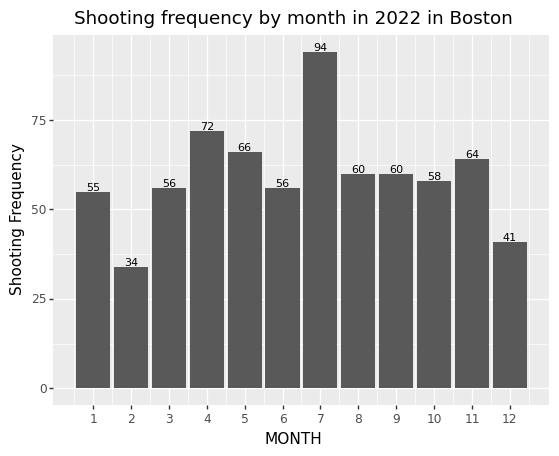

<ggplot: (172409141651)>

In [ ]:
(p9.ggplot(month_shoot, p9.aes(x = 'MONTH',y = 'SHOOTING'))+
 p9.geom_bar(stat = 'identity')+
 p9.geom_text(p9.aes(label = 'SHOOTING'), va = 'bottom', size = 8)+
 p9.labs(title = 'Shooting frequency by month in 2022 in Boston', y = 'Shooting Frequency')+
 p9.scale_x_continuous(breaks= month_shoot['MONTH']))

Looking at the barplot of shooting frequency by month for crimes committed in Boston in 2022 shows that July (month 7) had the most shootings and February had the least followed by December. The shooting frequency seems to be around 60 throughout the year with little fluction aside from the aforementioned extremes. This implies that some months might be significant in predicting whether a crime in Boston in 2022 involved a shooting. 

DAY OF WEEK

In [ ]:
day_shooting = crime[crime['SHOOTING']==1].groupby('DAY_OF_WEEK')['SHOOTING'].sum().reset_index()
day_shooting.head()

,DAY_OF_WEEK,SHOOTING
0,Friday,92
1,Monday,105
2,Saturday,140
3,Sunday,151
4,Thursday,69


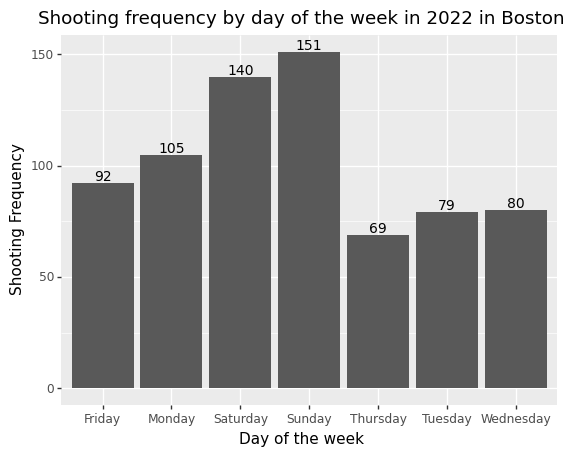

<ggplot: (172409124342)>

In [ ]:
(p9.ggplot(day_shooting,p9.aes(x='DAY_OF_WEEK',y = 'SHOOTING'))+
 p9.geom_bar(stat = 'identity')+
 p9.labs(title = 'Shooting frequency by day of the week in 2022 in Boston', x = 'Day of the week', y = 'Shooting Frequency')+
 p9.geom_text(p9.aes(label = 'SHOOTING'),va='bottom',size = 10))

The barchart of shooting frequency by day of the week in Boston in 2022 shows that the weekends have a much higher shooting frequency than other days of the week. Shooting frequency is lowest mid-week (Tuesday, Wednesday, Thursday). This implies that the days of the week are significant in predicting if a crime in Boston in 2022 involved a shooting.

Shooting frequency by district

In [ ]:
dist_shoot = crime[crime['SHOOTING'] == 1].groupby('DISTRICT')['SHOOTING'].value_counts().reset_index(name='Shootings_count')
dist_shoot.drop(columns='SHOOTING',inplace=True)
dist_shoot.head()

,DISTRICT,Shootings_count
0,A1,10
1,A15,8
2,A7,17
3,B2,170
4,B3,180


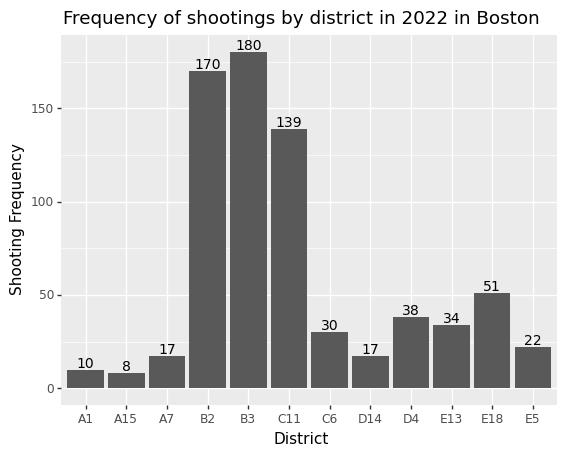

<ggplot: (172408287187)>

In [ ]:
(p9.ggplot(dist_shoot, p9.aes(x = 'DISTRICT',y = 'Shootings_count'))+
 p9.geom_bar(stat = 'identity')+
 p9.geom_text(p9.aes(label = 'Shootings_count'),va='bottom',size = 10)+
 p9.labs(title = 'Frequency of shootings by district in 2022 in Boston', y = 'Shooting Frequency', x = 'District'))

The barchart of the shooting frequency by districts in Boston in 2022 shows that districts B2, B3, and C11 have a significantly higher number of shootings compared to other districts. Districts A1 and A15 have the lowest shooting frequency. This implies that the district a crime occurred in can be used as a predictor for whether it involved a shooting or not. 

Variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
X = crime[['Lat','Long','MONTH','DAY_OF_WEEK','HOUR','DISTRICT']]
X = pd.get_dummies(X, columns=['MONTH','DAY_OF_WEEK','HOUR','DISTRICT'], drop_first=True)
Y = crime['SHOOTING']

In [ ]:
vif_table = pd.DataFrame({'Features': X.columns})
vif_table['VIF'] = [np.round(vif(X.values, i)) for i in range(len(X.columns))]

vif_table

,Features,VIF
0,Lat,17396348.0
1,Long,17436869.0
2,MONTH_2,2.0
3,MONTH_3,2.0
4,MONTH_4,2.0
5,MONTH_5,2.0
6,MONTH_6,2.0
7,MONTH_7,2.0
8,MONTH_8,2.0
9,MONTH_9,2.0


The variance inflation factor shows that Lat, Long, District_E18, and District_E5 have significant multicorrelation. It makes sense that Latitude and Longitude are highly correlated to each other (with scores of 17396348.0 and 17436869.0 respectively) and the district data since they all denote location. District_B3 has a VIF score of 9 which implies higher multicorrelation. Other variables have insignificant multicorrelation. 

Correlation

In [ ]:
correlation = np.round(X.corr(),3)
correlation[abs(correlation)>0.3].iloc[:,:20]

,Lat,Long,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,HOUR_1
Lat,1.000,0.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long,0.376,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
correlation[abs(correlation)>0.4].iloc[:,20:40]


,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21
Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
correlation[abs(correlation)>0.4].iloc[:,40:54]

,HOUR_22,HOUR_23,DISTRICT_A15,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5,DISTRICT_External
Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.476,NaN,NaN
Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554,NaN,NaN,NaN,-0.447,NaN
MONTH_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlation martrix shows that Districts D14, E5, E18, A7, and B3 have high correlation with Lat and Long. Furthermore, Lat and Long have a correlation of 0.376 as well. Because of the high multicorrelation that Lat and Long have, the first model that will be considered is a logistic lasso regression to investigate the relationship between crimes involving shootings and month, day, hour, and location. For all models, a random sample of crimes that did not involve shootings of size 716 is taken with all 716 crimes that involved shootings for training and testing. Otherwise, all models will be skewed to only predicting/classifying crimes as not involving shootings as it results in an accuracy of approximately $\frac{69291}{70007}= 0.9898.$

A logistic lasso regression is chosen because:
  - The response variable is binary (a crime involves a shooting or not),
  - There are multiple predictors and lasso will aid in feature selection and identifying the most signficant predictors,
  - Lasso will help mitigate the identified multicorrelation.

1) Logistic Lasso Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
shooting = crime[crime['SHOOTING']==1][['Lat','Long','MONTH','DAY_OF_WEEK','HOUR','DISTRICT','SHOOTING']]
noshooting = crime[crime['SHOOTING']==0][['Lat','Long','MONTH','DAY_OF_WEEK','HOUR','DISTRICT','SHOOTING']]

noshooting = noshooting.sample(n = shooting.shape[0])
data = pd.concat([shooting,noshooting], axis = 0, ignore_index= True)
data = data.sample(frac=1, random_state= 10)

In [ ]:
X1 = data[['Lat','Long','MONTH','DAY_OF_WEEK','HOUR','DISTRICT']]
X1 = pd.get_dummies(X1, columns=['MONTH','DAY_OF_WEEK','HOUR','DISTRICT'], drop_first=True)
Y = data['SHOOTING']

std_long = (X1.Long).std()
std_lat = (X1.Lat).std()
mean_long = (X1.Long).mean()
mean_lat = (X1.Lat).mean()

scaler = StandardScaler()
scaler.fit(X1)
X = pd.DataFrame(scaler.transform(X1))
X.set_axis(X1.columns, inplace=True, axis = 1)

C:\Users\nathn\AppData\Local\Temp\ipykernel_4504\3773742645.py:13: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


The categorical variables are converted to dummies and 1 level is dropped for each. Furthermore, the predictors are standardized in preparation of the logistic lasso regression.

In [ ]:
score_list = []
coefs = pd.DataFrame()
Cs = np.arange(0.01,2,0.02)

for c in Cs:
    reg = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True, C=c, random_state= 10)
    scores = cross_val_score(reg, X, Y, cv = 5, scoring= 'accuracy')
    score_list.append(scores.mean())
    tempmodel = reg.fit(X,Y)
    coefs = pd.concat([coefs,pd.Series(tempmodel.coef_[0]).to_frame().T])

coefs.set_axis(X.columns, axis = 1, inplace=True)
c_best = Cs[np.argmax(score_list)]

C:\Users\nathn\AppData\Local\Temp\ipykernel_4504\116672439.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [ ]:
print(score_list[np.argmax(score_list)])

0.7255476231085987


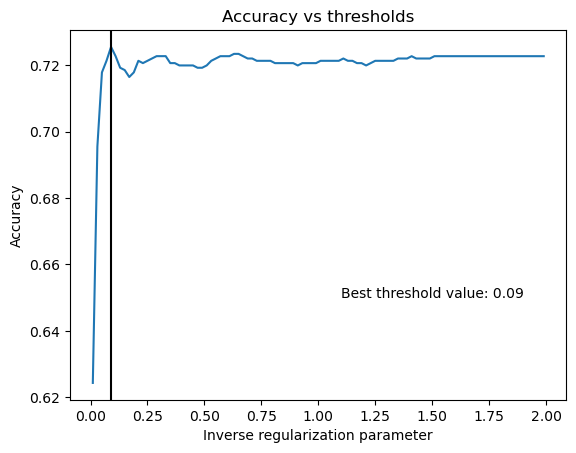

In [ ]:
plt.plot(Cs, score_list)
plt.axvline(c_best, c = 'black')
plt.xlabel('Inverse regularization parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs thresholds')
plt.text(1.1,0.65,'Best threshold value: ' + str(np.round(Cs[np.argmax(score_list)],5)))
plt.show()

5 fold cross validation for values of C (the inverse of the threshold) ranging from 0.01 to 2 shows that the best value for c is 0.09 which has an accuracy of 0.7255. 

In [ ]:
coefs.reset_index(inplace=True, drop = True)
output = coefs
output['Threshold'] = Cs
output_melt = pd.melt(output,id_vars='Threshold',var_name= 'Variables',value_name='Coefficients')
output_melt.head()

,Threshold,Variables,Coefficients
0,0.01,Lat,-0.208568
1,0.03,Lat,-0.290469
2,0.05,Lat,-0.297814
3,0.07,Lat,-0.321250
4,0.09,Lat,-0.346094


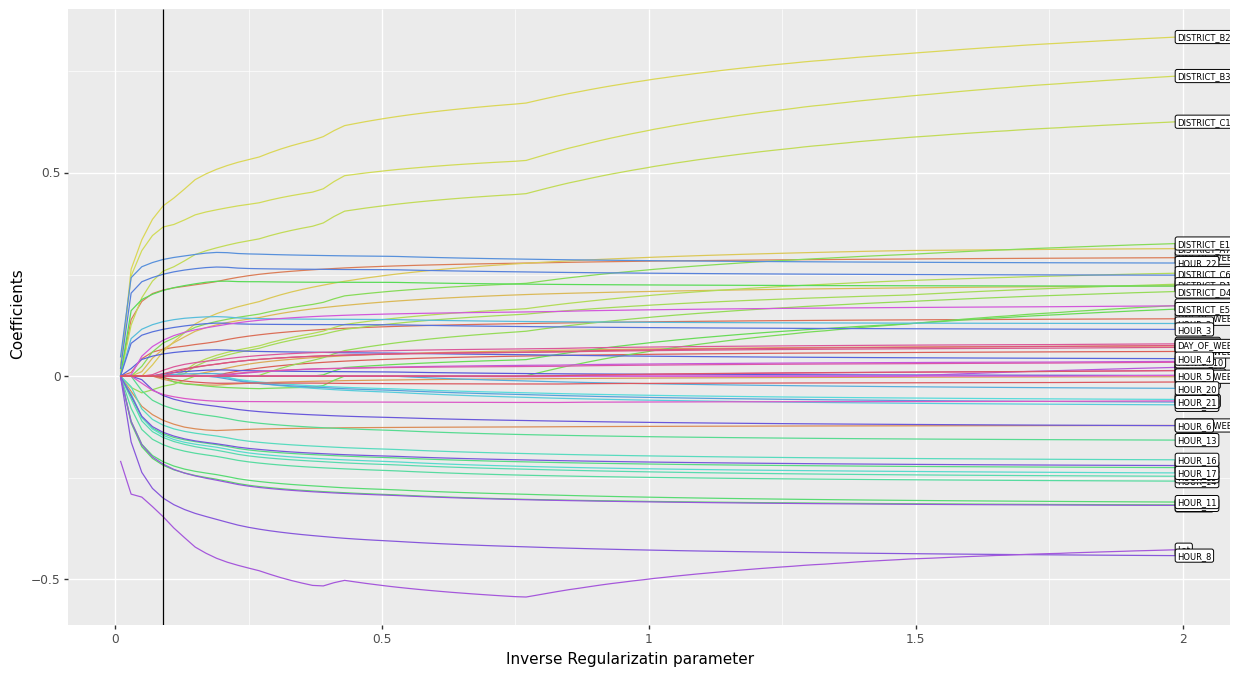

<ggplot: (172409534131)>

In [ ]:
maxT = output_melt.iloc[output_melt.shape[0]-1]['Threshold']
plt_label = output_melt[(output_melt['Threshold'] == maxT)]

(p9.ggplot(output_melt, p9.aes(x = 'Threshold' , y = 'Coefficients', color = 'Variables'))+
 p9.geom_line()+
 p9.labs(x = 'Inverse Regularizatin parameter')+
 p9.theme(legend_position="none", figure_size= (15,8))+
 p9.geom_vline(xintercept = c_best)+
 p9.geom_label(inherit_aes = False, data = plt_label, ha = 'left', mapping = p9.aes(label = 'Variables', x = maxT, y = 'Coefficients', size = 1)))

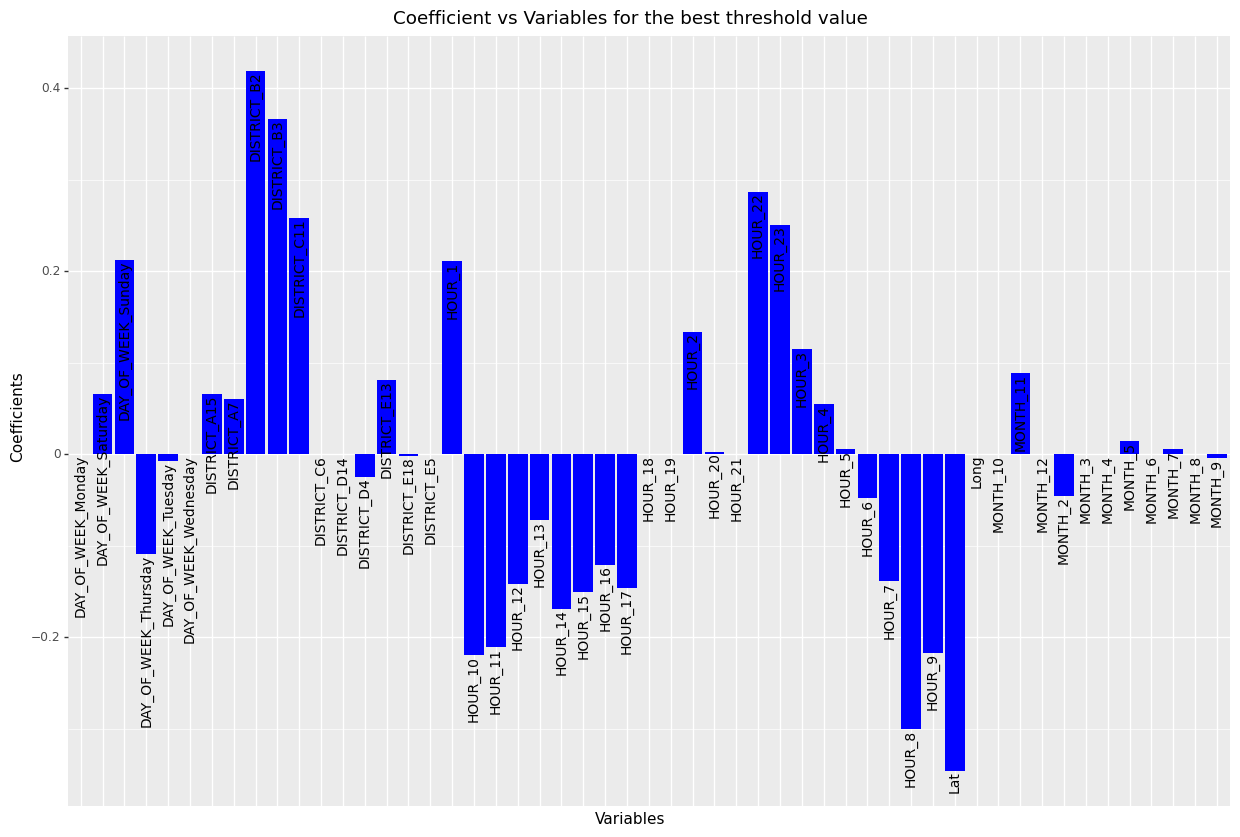

<ggplot: (172409085889)>

In [ ]:
coefs_best = output_melt[output_melt['Threshold']==c_best]

(p9.ggplot(coefs_best, p9.aes(y = 'Coefficients', x = 'Variables'))+
 p9.geom_bar(stat = 'identity', fill = 'blue')+
 p9.theme(figure_size=(15, 10), axis_text_x=p9.element_blank(), axis_ticks_major_x = p9.element_blank())+
 p9.labs(title = 'Coefficient vs Variables for the best threshold value')+
 p9.geom_text(p9.aes(label = 'Variables'),va='top',size = 10,angle = 90,color = 'black'))

The graph of the coefficients from the logistic lasso regression for multiple values of the threshold for different predictors above shows that the most signficant predictors and their coefficients at the best threshold are DISTRICT_B2 (0.41), DISTRICT_B3 (0.36), Lat (-0.33), HOUR_8 (-0.3), HOUR_22 (0.29), HOUR_23 (0.25), HOUR_1 (0.21), DAY_OF_WEEK_Sunday (0.21), HOUR_10 (-0.21), HOUR_9 (-0.22), and HOUR_11(-0.21). This shows that the most important predictors in general are mornings bewteen 8 - 11 which decrease the odds that a crime involves a shooting, late evenings between 22 - 1 which increase the odds that a crime involves a shooting, Latitude which decreases the odds that a crime invovles a shooting as one goes north, and districts where being in B2 and B3 districts increases the odds of a crime. Long, HOUR_21, HOUR_19, HOUR_18, DISTRICT_E5, DISTRICT C6, DISTRICT_D14, Wednesday have coefficients of 0 at this threshold. Hence, they don't have significance in predicting whether a crime involved a shooting or not. The remaining predictors have very little significance in the model. 

In [ ]:
X_train, X_test, Y_train, Y_text = train_test_split(X, Y, test_size=0.3)
reg2 = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True, C=c_best, random_state=10)
reg2.fit(X_train,Y_train)
y_pred = reg2.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(Y_test,np.argmax(y_pred,1))
cm

array([[ 97, 123],
       [103, 107]], dtype=int64)

In [ ]:
baseline = sum(Y_test == 1)/len(Y_test)
baseline

0.4883720930232558

In [ ]:
accuracy = (cm[0][0] + cm[1][1])/np.sum(cm)
accuracy

0.4744186046511628

A logistic lasso regression model is trained with 70% of the data that contains equal numbers of crimes involving shooting and not. This model has an accuracy of 0.474 when tested with the remainder 30% of the data not used for training the model. This is lower than the baseline accuracy which is 0.488 where all the prediction are that a crime involved a shooting. The sensitivity and specificity are equally low (0.509 and 0.44 respectively). 

In [ ]:
tpr2 = cm[1][1]/(cm[1][0] + cm[1][1])
tpr2

0.5095238095238095

In [ ]:
tnr2 = cm[0][0]/(cm[0][0] + cm[0][1])
tnr2

0.4409090909090909

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, y_pred[:, 1],pos_label=1)
auc2 = auc(fpr2, tpr2)
auc2

0.48385281385281387

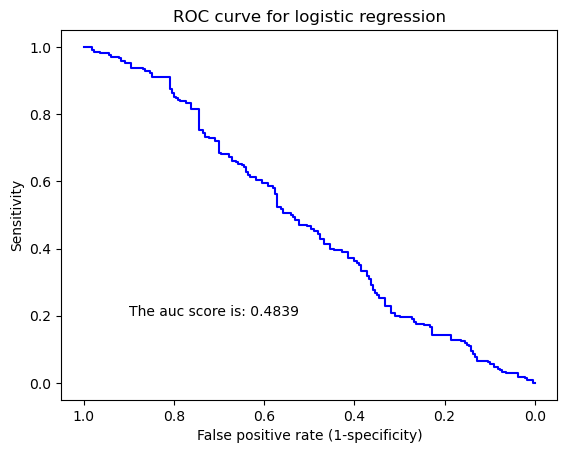

In [ ]:
plt.plot(fpr2, tpr2, c='blue')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('Sensitivity')
plt.gca().invert_xaxis()
plt.title('ROC curve for logistic regression')
plt.text(0.9,0.2, 'The auc score is: '+ str(np.round(auc2,4)))
plt.show()

The low performance of the model on the testing data is also demonstrated in its AUC of 0.4839. 

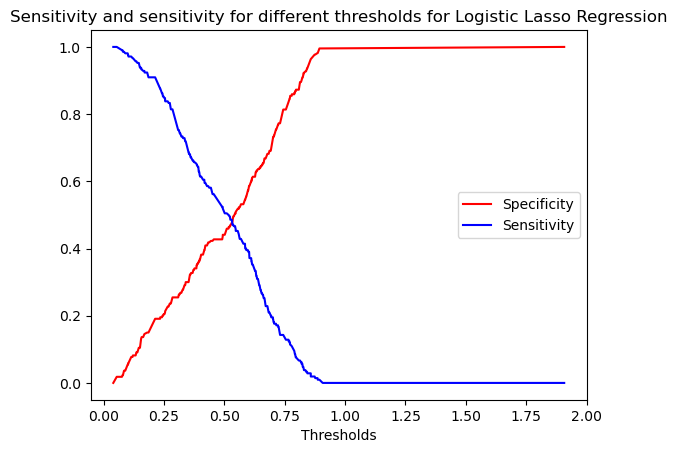

In [ ]:
plt.plot(thresholds2, 1-fpr2, c = 'red', label = 'Specificity')
plt.plot(thresholds2, tpr2, c = 'blue', label = 'Sensitivity')
plt.legend(loc = 0)
plt.xlabel('Thresholds')
plt.title('Sensitivity and sensitivity for different thresholds for Logistic Lasso Regression')
plt.show()

The threshold that maximizes the sensitivity and specificity is 0.55 resulting in a sensitivity and specificity of 0.49.

2) kNN classifier.

Finally, a kNN classifier will be used to classify crime as involving a shooting or not depending on all the predictors in the lasso logistic regression model. The predictors for the model are standardized since there are multiple which are not on the same scale. 

In [ ]:
Y = data['SHOOTING']
scores1 = []
neighbors = range(1,50)

for n in neighbors:
    knn = KNeighborsClassifier(n)
    score = cross_val_score(knn, X, Y, cv = 10, scoring= 'accuracy')
    scores1.append(score.mean())

print('The number of neighbors with the highest accuracy is:' ,neighbors[np.argmax(scores1)])

The number of neighbors with the highest accuracy is: 22


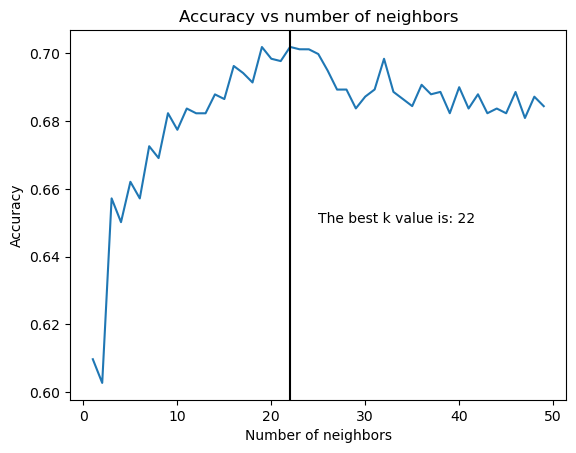

In [ ]:
plt.plot(neighbors, scores1)
plt.axvline(neighbors[np.argmax(scores1)], c = 'black')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of neighbors')
plt.text(25, 0.65, 'The best k value is: '+ str(neighbors[np.argmax(scores1)]))
plt.show()

The number of neighbros that results in the highest accuracy of the model is found to be 22 through 10 fold cross validation. This results in a model with accuracy of about 0.7.

The accuracy on this random test set is: 0.7023255813953488


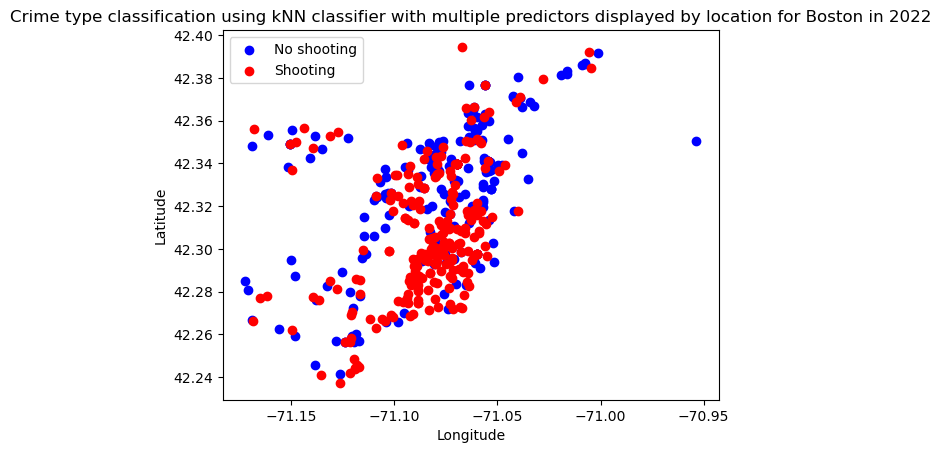

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors= neighbors[np.argmax(scores1)])
knn.fit(X_train,Y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
indexes_shooting = np.where(y_pred == 1)
indexes_noshooting = np.where(y_pred == 0)
print('The accuracy on this random test set is:',knn.score(X_test,Y_test))

long_noshooting = (X_test.iloc[indexes_noshooting]['Long']*std_long)+mean_long
lat_noshooting = (X_test.iloc[indexes_noshooting]['Lat']*std_lat)+mean_lat
long_shooting = (X_test.iloc[indexes_shooting]['Long']*std_long)+mean_long
lat_shooting = (X_test.iloc[indexes_shooting]['Lat']*std_lat)+mean_lat

plt.scatter(long_noshooting, lat_noshooting,c = 'blue', label = 'No shooting')
plt.scatter(long_shooting, lat_shooting, c = 'red', label = 'Shooting')
plt.legend(loc = 0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime type classification using kNN classifier with multiple predictors displayed by location for Boston in 2022')
plt.show()

A kNN classifier is trained with 70% of the data that contains equal numbers of crimes involving shooting and not. This model has an accuracy of 0.702 when tested with the remainder 30% of the data not used for training the model. Furthermore, the crimes with shootings are still concentrated in the same regions in this classification as prior kNN classifier. However, this model also accounts for district, month, day, and hour in making classifications. 

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
auc_score

0.7334501936852128

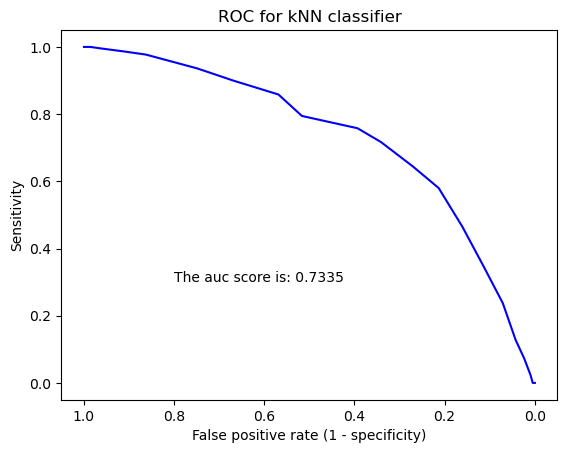

In [ ]:
plt.plot(fpr,tpr, c = 'blue')
plt.xlabel('False positive rate (1 - specificity)')
plt.ylabel('Sensitivity')
plt.gca().invert_xaxis()
plt.title('ROC for kNN classifier')
plt.text(0.8,0.3, 'The auc score is: ' +str(np.round(auc_score,4)))
plt.show()

The auc score for this model is 0.7335. This demonstrates that the model is performing well. In fact, this kNN classifier is performing much better than the logistic lasso regression which has an auc of 0.4839.

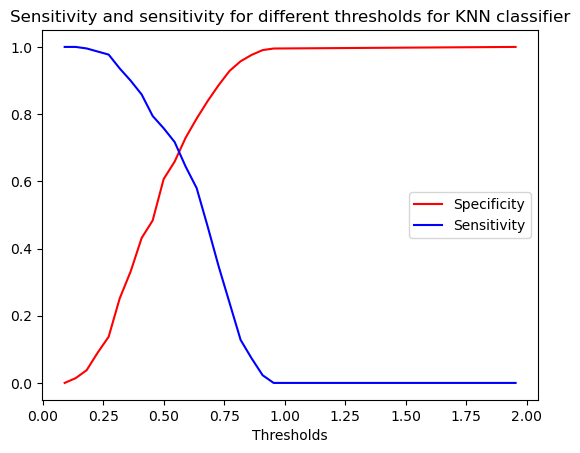

In [ ]:
plt.plot(thresholds, 1-fpr, c = 'red', label = 'Specificity')
plt.plot(thresholds, tpr, c = 'blue', label = 'Sensitivity')
plt.legend(loc = 0)
plt.xlabel('Thresholds')
plt.title('Sensitivity and sensitivity for different thresholds for KNN classifier')
plt.show()

The threshold that maximizes the specificity and sensitivity is about 0.6 resulting in a specificity and sensitivity of about 0.7. The sensitivity and specificity is about 0.2 higher than the logistic lasso regression model. 